In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [2]:
# 2. Load preprocessed feature data
data_path = "../data/processed/btc_features.csv"
df = pd.read_csv(data_path)

# Ensure Date is datetime and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

print("Shape of dataset:", df.shape)
display(df.head())

Shape of dataset: (4719, 16)


,Date,Price,Open,High,Low,Vol.,Change %,Price_lag1,Price_lag2,MA7,MA30,Price_change_1d,Volatility,RSI14,Daily_Return_pct,Rolling_volatility_7d
0,2012-04-30,4.9,4.9,5.0,4.9,55770.0,0.00,4.9,5.0,5.028571,4.980000,0.0,0.1,50.0,0.000000,0.095119
1,2012-05-01,5.0,4.9,5.0,4.9,36680.0,1.01,4.9,4.9,5.014286,4.986667,0.1,0.1,50.0,2.040816,0.089974
2,2012-05-02,5.1,5.0,5.2,5.0,95960.0,1.40,5.0,4.9,5.014286,4.990000,0.1,0.2,50.0,2.000000,0.089974
3,2012-05-03,5.1,5.1,5.2,5.0,35420.0,1.18,5.1,5.0,5.014286,4.996667,0.0,0.2,50.0,0.000000,0.089974
4,2012-05-04,5.1,5.1,5.2,5.1,43630.0,-1.17,5.1,5.1,5.014286,5.003333,0.0,0.1,37.5,0.000000,0.089974


In [3]:
# 3. Split data into X (features) and y (target)
X = df.drop(['Date', 'Price'], axis=1)  # All features except Date and Price
y = df['Price']  # Price is our target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training data size: {X_train.shape}, Testing data size: {X_test.shape}")

Training data size: (3775, 14), Testing data size: (944, 14)


In [4]:
# 4.1 Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluation metrics
print("Linear Regression Evaluation Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"R^2: {r2_score(y_test, y_pred_lr)}")


Linear Regression Evaluation Metrics:
MAE: 4.530131448873208e-11
MSE: 4.423860056006268e-21
RMSE: 6.65121045825966e-11
R^2: 1.0


In [5]:
# 5.1 Decision Tree Regressor Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluation metrics
print("Decision Tree Evaluation Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt))}")
print(f"R^2: {r2_score(y_test, y_pred_dt)}")


Decision Tree Evaluation Metrics:
MAE: 5448.06906779661
MSE: 145177333.4354873
RMSE: 12048.955698959446
R^2: 0.7862360138465725


In [6]:
# 6.1 XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation metrics
print("XGBoost Evaluation Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}")
print(f"R^2: {r2_score(y_test, y_pred_xgb)}")


XGBoost Evaluation Metrics:
MAE: 5404.061140674656
MSE: 145020375.4100328
RMSE: 12042.44059192458
R^2: 0.7864671241196843


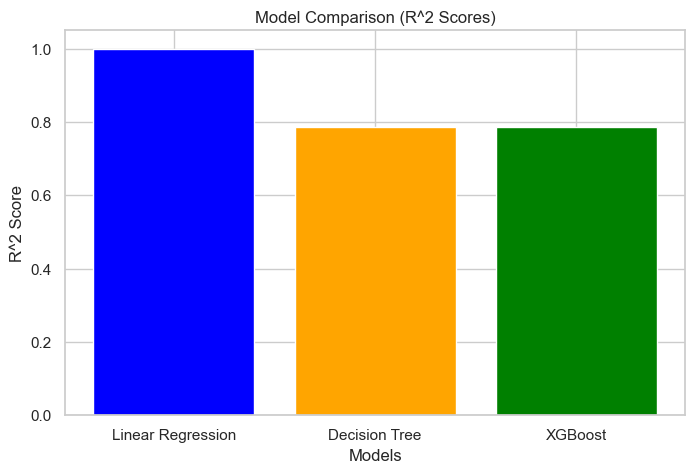

In [7]:
# 7. Model Comparison (R^2 scores)
models = ['Linear Regression', 'Decision Tree', 'XGBoost']
r2_scores = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_xgb)]

plt.figure(figsize=(8,5))
plt.bar(models, r2_scores, color=['blue', 'orange', 'green'])
plt.xlabel("Models")
plt.ylabel("R^2 Score")
plt.title("Model Comparison (R^2 Scores)")
plt.show()


In [8]:
# 8. Summary of best model
best_model_idx = np.argmax(r2_scores)
print(f"Best Model: {models[best_model_idx]} with R^2 Score of {r2_scores[best_model_idx]}")

Best Model: Linear Regression with R^2 Score of 1.0
